<a href="https://colab.research.google.com/github/donaldsony/Final-Project-CIND-820/blob/main/FINAL_GINI_CIND_820_Project_decision_tree_classification_baseline_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

## Importing the dataset

In [ ]:
from google.colab import files
uploaded= files.upload() 

import csv

dataset= pd.read_csv('CDR-Call-Details-Dataset1.csv')
#dataset = pd.read_csv('C:\Users\dcruz\Documents\Ryerson\Final Project\CDR-Call-Details-Dataset.csv')


Saving CDR-Call-Details-Dataset1.csv to CDR-Call-Details-Dataset1.csv


## 1. Exploratory Analysis

###### NUMBER OF ROWS AND COLUMNS

In [ ]:
dataset.shape

(101174, 20)

###### TOP 5 ROWS OF THE DATASET

In [ ]:
dataset.head()

Phone Number State  Account Length Intl Plan VMail Plan  VMail Message  \
0     382-4657    KS             128        no        yes             25   
1     371-7191    OH             107        no        yes             26   
2     358-1921    NJ             137        no         no              0   
3     375-9999    OH              84       yes         no              0   
4     330-6626    OK              75       yes         no              0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls Churn  
0               1    No  
1               1    No  
2               0    No  
3               2    No  
4               3    No

###### IDENTIFYING MISSING VALUES COLUMNS

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   State           101174 non-null  object 
 2   Account Length  101174 non-null  int64  
 3   Intl Plan       101174 non-null  object 
 4   VMail Plan      101174 non-null  object 
 5   VMail Message   101174 non-null  int64  
 6   Day Mins        101174 non-null  float64
 7   Day Calls       101174 non-null  int64  
 8   Day Charge      101174 non-null  float64
 9   Eve Mins        101174 non-null  float64
 10  Eve Calls       101174 non-null  int64  
 11  Eve Charge      101174 non-null  float64
 12  Night Mins      101174 non-null  float64
 13  Night Calls     101174 non-null  int64  
 14  Night Charge    101174 non-null  float64
 15  Intl Mins       101174 non-null  float64
 16  Intl Calls      101174 non-null  int64  
 17  Intl Charg

###### IDENTIFYING NUMERICAL AND CATEGORICAL COLUMNS

In [ ]:
dataset.dtypes

Phone Number       object
State              object
Account Length      int64
Intl Plan          object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object

In [ ]:
dataset.columns

Index(['Phone Number', 'State', 'Account Length', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [ ]:
dataset._get_numeric_data().columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [ ]:
set(dataset.columns)-set(dataset._get_numeric_data().columns)

{'Churn', 'Intl Plan', 'Phone Number', 'State', 'VMail Plan'}

###### NUMBER OF UNIQUE VALUES IN EACH COLUMN-(PHONE NUMBER IS LIKE A UNIQUE ID AND CAN BE DROPPED)

In [ ]:
dataset.nunique()

Phone Number      7467
State               51
Account Length     322
Intl Plan            2
VMail Plan           2
VMail Message       72
Day Mins          2548
Day Calls          221
Day Charge        2873
Eve Mins          2523
Eve Calls          224
Eve Charge        2221
Night Mins        2464
Night Calls        218
Night Charge      1470
Intl Mins          267
Intl Calls          39
Intl Charge        339
CustServ Calls      11
Churn                2
dtype: int64

In [ ]:
dataset = dataset.drop(["Phone Number"], axis=1)
dataset.head()

State  Account Length Intl Plan VMail Plan  VMail Message  Day Mins  \
0    KS             128        no        yes             25     265.1   
1    OH             107        no        yes             26     161.6   
2    NJ             137        no         no              0     243.4   
3    OH              84       yes         no              0     299.4   
4    OK              75       yes         no              0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0        110       45.07     197.4         99       16.78       244.7   
1        123       27.47     195.5        103       16.62       254.4   
2        114       41.38     121.2        110       10.30       162.6   
3         71       50.90      61.9         88        5.26       196.9   
4        113       28.34     148.3        122       12.61       186.9   

   Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0           91         11.01       10.0           3         2.70   
1          103         11.45       13.7           3         3.70   
2          104          7.32       12.2           5         3.29   
3           89          8.86        6.6           7         1.78   
4          121          8.41       10.1           3         2.73   

   CustServ Calls Churn  
0               1    No  
1               1    No  
2               0    No  
3               2    No  
4               3    No

###### CALCULATE CHURN PERCENTAGE

In [ ]:
dataset["Churn"].value_counts()

No     90642
Yes    10532
Name: Churn, dtype: int64

In [ ]:
CHURN_TRUE=(10532/101174)*100
CHURN_FALSE=(90642/101174)*100
print(f"{CHURN_TRUE}%")
print(f"{CHURN_FALSE}%")

10.409789076244886%
89.59021092375512%


In [ ]:
dataset["Churn"].value_counts(normalize=True)

No     0.895902
Yes    0.104098
Name: Churn, dtype: float64

##### WHAT ARE THE AVERAGE VALUES OF NUMERICAL FEATURES FOR CHURNED CUSTOMERS

In [ ]:
dataset[dataset["Churn"] == ('No')].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account Length    316.179089
VMail Message      18.789325
Day Mins          570.329984
Day Calls         264.215982
Day Charge         64.642064
Eve Mins          639.999380
Eve Calls         264.212429
Eve Charge         34.113644
Night Mins        631.440004
Night Calls       258.804153
Night Charge       13.931364
Intl Mins          19.986469
Intl Calls          5.763487
Intl Charge         4.333314
CustServ Calls      2.536925
dtype: float64

##### WHAT ARE THE AVERAGE VALUES OF NUMERICAL FEATURES FOR RETAINED CUSTOMERS

In [ ]:
dataset[dataset["Churn"] == ('Yes')].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account Length    387.439518
VMail Message      12.577098
Day Mins          731.244045
Day Calls         292.954615
Day Charge         67.684846
Eve Mins          789.023978
Eve Calls         292.594379
Eve Charge         36.462208
Night Mins        778.865084
Night Calls       286.365078
Night Charge       13.631432
Intl Mins          22.914480
Intl Calls          5.516711
Intl Charge         4.470883
CustServ Calls      2.755127
dtype: float64

###### DESCRIPTIVE STATISTICS FOR COLUMNS

In [ ]:
dataset.describe()

Account Length  VMail Message       Day Mins      Day Calls  \
count   101174.000000  101174.000000  101174.000000  101174.000000   
mean       323.597149      18.142645     587.080798     267.207613   
std       1418.073651      75.826932    2193.094319     947.963370   
min          1.000000       0.000000       0.000000       0.000000   
25%         69.000000       0.000000     222.300000      88.000000   
50%        202.000000       0.000000     262.200000     202.000000   
75%        240.000000      22.000000     326.275000     224.000000   
max      21111.000000    1111.000000  111111.110000   21111.000000   

          Day Charge       Eve Mins      Eve Calls     Eve Charge  \
count  101174.000000  101174.000000  101174.000000  101174.000000   
mean       64.958811     655.512526     267.166930      34.358125   
std       133.515808    2473.445436     932.914437      36.248577   
min         0.000000       0.000000       0.000000       0.000000   
25%        23.920000     223.300000      88.000000      22.220000   
50%        32.600000     268.200000     202.000000      24.440000   
75%        82.200000     329.200000     224.000000      32.020000   
max      1111.990000  111111.200000   21111.000000     211.990000   

          Night Mins    Night Calls   Night Charge      Intl Mins  \
count  101174.000000  101174.000000  101174.000000  101174.000000   
mean      646.786643     261.673187      13.900142      20.291269   
std      2368.028491     884.963021      16.178685      25.033214   
min        20.300000      20.000000       1.040000       0.000000   
25%       223.200000      88.000000       6.220000       8.800000   
50%       268.200000     202.000000       9.220000      20.200000   
75%       329.200000     224.000000      20.440000      22.800000   
max    111111.110000   21111.000000     211.920000     211.900000   

          Intl Calls    Intl Charge  CustServ Calls  
count  101174.000000  101174.000000   101174.000000  
mean        5.737798       4.347635        2.559640  
std         8.196367       2.761911        2.401904  
min         0.000000       0.000000        0.000000  
25%         2.000000       2.280000        2.000000  
50%         4.000000       2.920000        2.000000  
75%         8.000000       4.940000        3.000000  
max       211.000000      11.920000       11.000000

In [ ]:
dataset.describe(include=["object", "bool"])

State Intl Plan VMail Plan   Churn
count   101174    101174     101174  101174
unique      51         2          2       2
top         WV        no         no      No
freq      3211     91367      73164   90642

In [ ]:
#IN THIS SECTION WE CAN INCLUDE GRAPHS FROM PANDAS PROFILE TO SHOW DISTRIBUTIONS ARE NORMAL

### DIVIDING THE DATASET TO FEATURES(INDEPENDENT VARIABLES) AND CLASS ATTRIBUTE(DEPENDENT VARIABLE)

In [ ]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X=pd.DataFrame(X)

In [ ]:
X

0    1    2    3   4      5    6      7      8    9      10     11  \
0       KS  128   no  yes  25  265.1  110  45.07  197.4   99  16.78  244.7   
1       OH  107   no  yes  26  161.6  123  27.47  195.5  103  16.62  254.4   
2       NJ  137   no   no   0  243.4  114  41.38  121.2  110   10.3  162.6   
3       OH   84  yes   no   0  299.4   71   50.9   61.9   88   5.26  196.9   
4       OK   75  yes   no   0  166.7  113  28.34  148.3  122  12.61  186.9   
...     ..  ...  ...  ...  ..    ...  ...    ...    ...  ...    ...    ...   
101169  CO  222   no   no   0  228.2   60  22.82  229.8  289  28.26  222.8   
101170  SC   88   no   no   0  282.2  222  82.88  208.8  220  22.82  282.2   
101171  MI   22   no   no   0  222.2   62  88.66  228.0  228  22.08   62.2   
101172  MD  228   no   no   0  222.0   99  88.08  220.2   80  22.92  282.9   
101173  IN  228   no   no   0  226.2   98  86.28  288.2  208  28.28  800.0   

         12     13    14 15    16 17  
0        91  11.01  10.0  3   2.7  1  
1       103  11.45  13.7  3   3.7  1  
2       104   7.32  12.2  5  3.29  0  
3        89   8.86   6.6  7  1.78  2  
4       121   8.41  10.1  3  2.73  3  
...     ...    ...   ... ..   ... ..  
101169  222   2.28   6.2  2  2.62  2  
101170  200  20.68   9.8  8  2.82  8  
101171  209   2.26   2.8  6  2.22  2  
101172   28  20.22   2.2  8  0.82  0  
101173  228   28.8  20.0  8   2.2  2  

[101174 rows x 18 columns]

### LABEL ENCODING-CONVERT CATEGORICAL TO NUMERICAL VALUES

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[0] = le.fit_transform(X[0])

In [ ]:
X

0    1    2    3   4      5    6      7      8    9      10     11  \
0       16  128   no  yes  25  265.1  110  45.07  197.4   99  16.78  244.7   
1       35  107   no  yes  26  161.6  123  27.47  195.5  103  16.62  254.4   
2       31  137   no   no   0  243.4  114  41.38  121.2  110   10.3  162.6   
3       35   84  yes   no   0  299.4   71   50.9   61.9   88   5.26  196.9   
4       36   75  yes   no   0  166.7  113  28.34  148.3  122  12.61  186.9   
...     ..  ...  ...  ...  ..    ...  ...    ...    ...  ...    ...    ...   
101169   5  222   no   no   0  228.2   60  22.82  229.8  289  28.26  222.8   
101170  40   88   no   no   0  282.2  222  82.88  208.8  220  22.82  282.2   
101171  22   22   no   no   0  222.2   62  88.66  228.0  228  22.08   62.2   
101172  20  228   no   no   0  222.0   99  88.08  220.2   80  22.92  282.9   
101173  15  228   no   no   0  226.2   98  86.28  288.2  208  28.28  800.0   

         12     13    14 15    16 17  
0        91  11.01  10.0  3   2.7  1  
1       103  11.45  13.7  3   3.7  1  
2       104   7.32  12.2  5  3.29  0  
3        89   8.86   6.6  7  1.78  2  
4       121   8.41  10.1  3  2.73  3  
...     ...    ...   ... ..   ... ..  
101169  222   2.28   6.2  2  2.62  2  
101170  200  20.68   9.8  8  2.82  8  
101171  209   2.26   2.8  6  2.22  2  
101172   28  20.22   2.2  8  0.82  0  
101173  228   28.8  20.0  8   2.2  2  

[101174 rows x 18 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[2]= le.fit_transform(X[2])

In [ ]:
X

0    1   2    3   4      5    6      7      8    9      10     11  \
0       16  128   0  yes  25  265.1  110  45.07  197.4   99  16.78  244.7   
1       35  107   0  yes  26  161.6  123  27.47  195.5  103  16.62  254.4   
2       31  137   0   no   0  243.4  114  41.38  121.2  110   10.3  162.6   
3       35   84   1   no   0  299.4   71   50.9   61.9   88   5.26  196.9   
4       36   75   1   no   0  166.7  113  28.34  148.3  122  12.61  186.9   
...     ..  ...  ..  ...  ..    ...  ...    ...    ...  ...    ...    ...   
101169   5  222   0   no   0  228.2   60  22.82  229.8  289  28.26  222.8   
101170  40   88   0   no   0  282.2  222  82.88  208.8  220  22.82  282.2   
101171  22   22   0   no   0  222.2   62  88.66  228.0  228  22.08   62.2   
101172  20  228   0   no   0  222.0   99  88.08  220.2   80  22.92  282.9   
101173  15  228   0   no   0  226.2   98  86.28  288.2  208  28.28  800.0   

         12     13    14 15    16 17  
0        91  11.01  10.0  3   2.7  1  
1       103  11.45  13.7  3   3.7  1  
2       104   7.32  12.2  5  3.29  0  
3        89   8.86   6.6  7  1.78  2  
4       121   8.41  10.1  3  2.73  3  
...     ...    ...   ... ..   ... ..  
101169  222   2.28   6.2  2  2.62  2  
101170  200  20.68   9.8  8  2.82  8  
101171  209   2.26   2.8  6  2.22  2  
101172   28  20.22   2.2  8  0.82  0  
101173  228   28.8  20.0  8   2.2  2  

[101174 rows x 18 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[3] = le.fit_transform(X[3])

In [ ]:
X

0    1   2   3   4      5    6      7      8    9      10     11   12  \
0       16  128   0   1  25  265.1  110  45.07  197.4   99  16.78  244.7   91   
1       35  107   0   1  26  161.6  123  27.47  195.5  103  16.62  254.4  103   
2       31  137   0   0   0  243.4  114  41.38  121.2  110   10.3  162.6  104   
3       35   84   1   0   0  299.4   71   50.9   61.9   88   5.26  196.9   89   
4       36   75   1   0   0  166.7  113  28.34  148.3  122  12.61  186.9  121   
...     ..  ...  ..  ..  ..    ...  ...    ...    ...  ...    ...    ...  ...   
101169   5  222   0   0   0  228.2   60  22.82  229.8  289  28.26  222.8  222   
101170  40   88   0   0   0  282.2  222  82.88  208.8  220  22.82  282.2  200   
101171  22   22   0   0   0  222.2   62  88.66  228.0  228  22.08   62.2  209   
101172  20  228   0   0   0  222.0   99  88.08  220.2   80  22.92  282.9   28   
101173  15  228   0   0   0  226.2   98  86.28  288.2  208  28.28  800.0  228   

           13    14 15    16 17  
0       11.01  10.0  3   2.7  1  
1       11.45  13.7  3   3.7  1  
2        7.32  12.2  5  3.29  0  
3        8.86   6.6  7  1.78  2  
4        8.41  10.1  3  2.73  3  
...       ...   ... ..   ... ..  
101169   2.28   6.2  2  2.62  2  
101170  20.68   9.8  8  2.82  8  
101171   2.26   2.8  6  2.22  2  
101172  20.22   2.2  8  0.82  0  
101173   28.8  20.0  8   2.2  2  

[101174 rows x 18 columns]

## FEATURE SELECTION

In [ ]:
from sklearn import ensemble

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

In [ ]:
X

0    1   2   3   4      5    6      7      8    9      10     11   12  \
0       16  128   0   1  25  265.1  110  45.07  197.4   99  16.78  244.7   91   
1       35  107   0   1  26  161.6  123  27.47  195.5  103  16.62  254.4  103   
2       31  137   0   0   0  243.4  114  41.38  121.2  110   10.3  162.6  104   
3       35   84   1   0   0  299.4   71   50.9   61.9   88   5.26  196.9   89   
4       36   75   1   0   0  166.7  113  28.34  148.3  122  12.61  186.9  121   
...     ..  ...  ..  ..  ..    ...  ...    ...    ...  ...    ...    ...  ...   
101169   5  222   0   0   0  228.2   60  22.82  229.8  289  28.26  222.8  222   
101170  40   88   0   0   0  282.2  222  82.88  208.8  220  22.82  282.2  200   
101171  22   22   0   0   0  222.2   62  88.66  228.0  228  22.08   62.2  209   
101172  20  228   0   0   0  222.0   99  88.08  220.2   80  22.92  282.9   28   
101173  15  228   0   0   0  226.2   98  86.28  288.2  208  28.28  800.0  228   

           13    14 15    16 17  
0       11.01  10.0  3   2.7  1  
1       11.45  13.7  3   3.7  1  
2        7.32  12.2  5  3.29  0  
3        8.86   6.6  7  1.78  2  
4        8.41  10.1  3  2.73  3  
...       ...   ... ..   ... ..  
101169   2.28   6.2  2  2.62  2  
101170  20.68   9.8  8  2.82  8  
101171   2.26   2.8  6  2.22  2  
101172  20.22   2.2  8  0.82  0  
101173   28.8  20.0  8   2.2  2  

[101174 rows x 18 columns]

In [ ]:
X.columns=['State', 'Account Length', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

In [ ]:
X

State Account Length  Intl Plan  VMail Plan VMail Message Day Mins  \
0          16            128          0           1            25    265.1   
1          35            107          0           1            26    161.6   
2          31            137          0           0             0    243.4   
3          35             84          1           0             0    299.4   
4          36             75          1           0             0    166.7   
...       ...            ...        ...         ...           ...      ...   
101169      5            222          0           0             0    228.2   
101170     40             88          0           0             0    282.2   
101171     22             22          0           0             0    222.2   
101172     20            228          0           0             0    222.0   
101173     15            228          0           0             0    226.2   

       Day Calls Day Charge Eve Mins Eve Calls Eve Charge Night Mins  \
0            110      45.07    197.4        99      16.78      244.7   
1            123      27.47    195.5       103      16.62      254.4   
2            114      41.38    121.2       110       10.3      162.6   
3             71       50.9     61.9        88       5.26      196.9   
4            113      28.34    148.3       122      12.61      186.9   
...          ...        ...      ...       ...        ...        ...   
101169        60      22.82    229.8       289      28.26      222.8   
101170       222      82.88    208.8       220      22.82      282.2   
101171        62      88.66    228.0       228      22.08       62.2   
101172        99      88.08    220.2        80      22.92      282.9   
101173        98      86.28    288.2       208      28.28      800.0   

       Night Calls Night Charge Intl Mins Intl Calls Intl Charge  \
0               91        11.01      10.0          3         2.7   
1              103        11.45      13.7          3         3.7   
2              104         7.32      12.2          5        3.29   
3               89         8.86       6.6          7        1.78   
4              121         8.41      10.1          3        2.73   
...            ...          ...       ...        ...         ...   
101169         222         2.28       6.2          2        2.62   
101170         200        20.68       9.8          8        2.82   
101171         209         2.26       2.8          6        2.22   
101172          28        20.22       2.2          8        0.82   
101173         228         28.8      20.0          8         2.2   

       CustServ Calls  
0                   1  
1                   1  
2                   0  
3                   2  
4                   3  
...               ...  
101169              2  
101170              8  
101171              2  
101172              0  
101173              2  

[101174 rows x 18 columns]

[0.0381953  0.00955743 0.25924799 0.02550633 0.02348177 0.15082013
 0.01604766 0.06432712 0.03486163 0.01838074 0.02178663 0.02449161
 0.01697901 0.01871766 0.09889447 0.06328516 0.05374532 0.06167406]


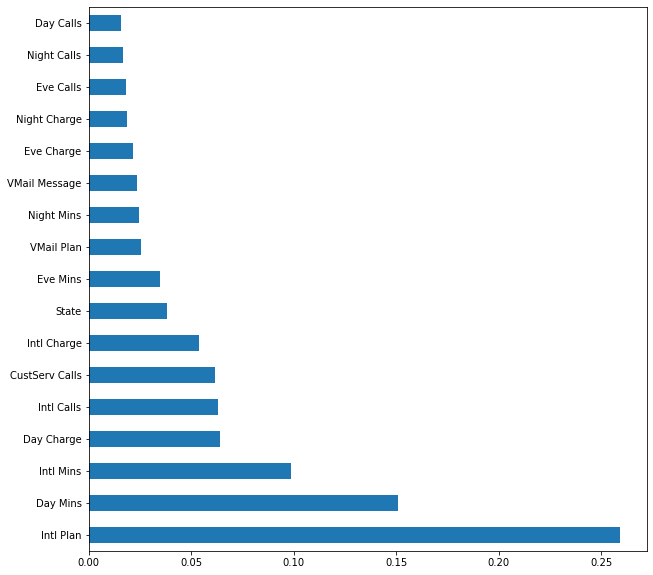

In [ ]:
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=(X.columns))
feat_importances = feat_importances.nlargest(17)
feat_importances.plot(kind='barh' , figsize=(10,10))

## ENCODING-ONE HOT CODING OF CATEGORICAL DATA

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

In [ ]:
X[0]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  , 128.  ,   0.  ,   1.  ,  25.  , 265.1 ,
       110.  ,  45.07, 197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,
        10.  ,   3.  ,   2.7 ,   1.  ])

In [ ]:
X[0]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  , 128.  ,   0.  ,   1.  ,  25.  , 265.1 ,
       110.  ,  45.07, 197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,
        10.  ,   3.  ,   2.7 ,   1.  ])

In [ ]:
X.shape

(101174, 68)

Encoding the Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y[0])

0


In [ ]:
X=np.array(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train[0])

[  0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.   223.     0.     0.     0.   223.2  222.    30.33 222.    96.
  23.02 223.9   92.    22.02  26.2    3.     2.23   2.  ]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


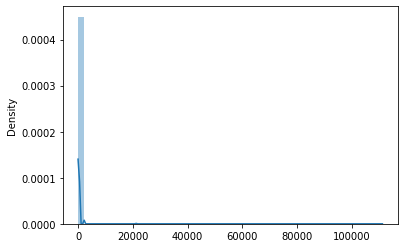

In [ ]:
sn.distplot(X_train)

In [ ]:
print(type(X_train[0][7]))

<class 'numpy.float64'>


In [ ]:
print(y_train[0])

0


In [ ]:
print(type(y_train[0]))

<class 'numpy.int64'>


In [ ]:
print(X_test[0])

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 2.11000e+02 0.00000e+00 0.00000e+00
 0.00000e+00 2.22200e+02 2.02000e+02 2.22200e+01 1.12112e+04 2.11000e+02
 2.20900e+01 2.22200e+02 2.01100e+03 2.00110e+01 2.22000e+01 2.00000e+00
 1.10000e+01 2.00000e+00]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


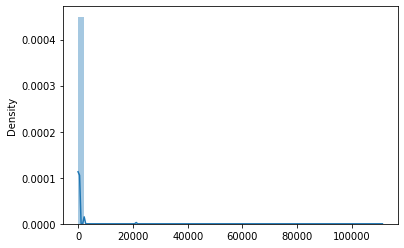

In [ ]:
sn.distplot(X_test)

In [ ]:
print(y_test[0])

0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train[0])

[-0.12611629 -0.15891193 -0.12941907 -0.13957576 -0.1020444  -0.14128347
 -0.14922977  7.72683635 -0.13868995 -0.13849239 -0.12815002 -0.12708344
 -0.11713336 -0.14932203 -0.13192294 -0.14737345 -0.14573144 -0.1343833
 -0.12508781 -0.14171953 -0.14459562 -0.1380965  -0.15042516 -0.15969475
 -0.14011454 -0.14016342 -0.14435795 -0.14369058 -0.13844296 -0.13589999
 -0.13093717 -0.14316421 -0.13849239 -0.14186461 -0.16012815 -0.15516724
 -0.13735134 -0.15445318 -0.11632137 -0.14215435 -0.13685249 -0.13392519
 -0.12686911 -0.14839705 -0.14909128 -0.1536912  -0.14932203 -0.14181626
 -0.1536912  -0.1810758  -0.15373612 -0.07157653 -0.32648162 -0.62005598
 -0.23977652 -0.16444325 -0.04744631 -0.25957345 -0.17873334 -0.18290101
 -0.3121648  -0.17828624 -0.19031207  0.4982907   0.23527543 -0.33185785
 -0.76560784 -0.23356695]


In [ ]:
print(X_test[0])

[-0.12611629 -0.15891193 -0.12941907 -0.13957576 -0.1020444  -0.14128347
  6.70107575 -0.12941907 -0.13868995 -0.13849239 -0.12815002 -0.12708344
 -0.11713336 -0.14932203 -0.13192294 -0.14737345 -0.14573144 -0.1343833
 -0.12508781 -0.14171953 -0.14459562 -0.1380965  -0.15042516 -0.15969475
 -0.14011454 -0.14016342 -0.14435795 -0.14369058 -0.13844296 -0.13589999
 -0.13093717 -0.14316421 -0.13849239 -0.14186461 -0.16012815 -0.15516724
 -0.13735134 -0.15445318 -0.11632137 -0.14215435 -0.13685249 -0.13392519
 -0.12686911 -0.14839705 -0.14909128 -0.1536912  -0.14932203 -0.14181626
 -0.1536912  -0.1810758  -0.15373612 -0.0799675  -0.32648162 -0.62005598
 -0.23977652 -0.16488996 -0.06860781 -0.31984784  4.36891147 -0.0595689
 -0.33791477 -0.17900537  1.94713369  0.37494469  0.07560891 -0.45286745
  2.41347746 -0.23356695]


In [ ]:
pd.DataFrame(X_train)

0         1         2         3         4         5        6   \
0     -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
1     -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
2     -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
3     -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
4     -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
...         ...       ...       ...       ...       ...       ...      ...   
75875 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
75876 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
75877 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
75878 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
75879 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   

             7        8         9   ...        58        59        60  \
0      7.726836 -0.13869 -0.138492  ... -0.178733 -0.182901 -0.312165   
1     -0.129419 -0.13869 -0.138492  ... -0.186844 -0.025250 -0.829933   
2     -0.129419 -0.13869 -0.138492  ... -0.150510  1.870847 -0.223563   
3     -0.129419 -0.13869 -0.138492  ... -0.176168 -0.047772 -0.332377   
4     -0.129419 -0.13869 -0.138492  ... -0.086698 -0.238669  0.403850   
...         ...      ...       ...  ...       ...       ...       ...   
75875 -0.129419 -0.13869 -0.138492  ... -0.174512 -0.046699 -0.129423   
75876 -0.129419 -0.13869 -0.138492  ...  0.106477 -0.187191 -0.644672   
75877 -0.129419 -0.13869 -0.138492  ...  0.602658  1.870847  4.895752   
75878 -0.129419 -0.13869 -0.138492  ... -0.179189 -0.187191 -0.389941   
75879 -0.129419 -0.13869 -0.138492  ... -0.088353 -0.179684  0.293098   

             61        62        63        64        65        66        67  
0     -0.178286 -0.190312  0.498291  0.235275 -0.331858 -0.765608 -0.233567  
1     -0.187381 -0.190312 -0.717364 -0.443307 -0.452867 -0.765608 -1.067319  
2      0.958413  1.947134 -0.135937 -0.443307  0.031171 -0.772495 -0.233567  
3     -0.179851 -0.183629 -0.690350  0.023717  0.273190 -0.515486 -0.233567  
4     -0.083149  0.201757 -0.308462  0.786125 -0.210848  0.021007  0.600185  
...         ...       ...       ...       ...       ...       ...       ...  
75875 -0.174352 -0.045514 -0.653512  0.075609 -0.331858 -0.479236 -0.233567  
75876  0.662345 -0.037717 -0.177626 -0.371457  1.967325 -0.754733 -0.233567  
75877 -0.176129 -0.160239 -0.174617 -0.004224 -0.452867 -0.805845 -0.233567  
75878 -0.177144 -0.047741  0.386549 -0.004224  0.394200 -0.805845 -1.067319  
75879 -0.085010 -0.194767  1.659917  1.137391  0.273190  1.499989  0.600185  

[75880 rows x 68 columns]

### BALANCING DATASETS

In [ ]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy='auto', random_state=2)
X_train, y_train = over.fit_resample(X_train, y_train)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_train.shape}''')

print('\nBalance of positive and negative classes (%):')
pd.DataFrame(y_train).value_counts(normalize=True) * 100

Shape of X before SMOTE: (101174, 68)
Shape of X after SMOTE: (135976, 68)

Balance of positive and negative classes (%):


0    50.0
1    50.0
dtype: float64

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Visualize the Decision Tree

In [ ]:
X1=pd.DataFrame(X_train,columns=["AK","AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV", "WY"

,"Int'l Plan","VMailPlan","Account Length","VMailMessage","Day Mins",
"Day Calls","Day Charge",       
"Eve Mins",          
"Eve Calls",         
"Eve Charge",        
"Night Mins",        
"Night Calls",       
"Night Charge",      
"Intl Mins",       
"Intl Calls",       
"Intl Charge",       
"CustServ Calls"])

In [ ]:
X1

AK        AL        AR        AZ        CA        CO       CT  \
0      -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
1      -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
2      -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
3      -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
4      -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
...          ...       ...       ...       ...       ...       ...      ...   
135971 -0.126116  6.292794 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
135972 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
135973 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
135974 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   
135975 -0.126116 -0.158912 -0.129419 -0.139576 -0.102044 -0.141283 -0.14923   

              DC       DE        FL  ...  Eve Mins  Eve Calls  Eve Charge  \
0       7.726836 -0.13869 -0.138492  ... -0.178733  -0.182901   -0.312165   
1      -0.129419 -0.13869 -0.138492  ... -0.186844  -0.025250   -0.829933   
2      -0.129419 -0.13869 -0.138492  ... -0.150510   1.870847   -0.223563   
3      -0.129419 -0.13869 -0.138492  ... -0.176168  -0.047772   -0.332377   
4      -0.129419 -0.13869 -0.138492  ... -0.086698  -0.238669    0.403850   
...          ...      ...       ...  ...       ...        ...         ...   
135971 -0.129419 -0.13869 -0.138492  ... -0.153821  -0.215075   -0.149359   
135972 -0.129419 -0.13869 -0.138492  ... -0.178688  -0.061714    4.895752   
135973 -0.129419 -0.13869 -0.138492  ... -0.174471  -0.251538   -0.301920   
135974 -0.129419 -0.13869 -0.138492  ... -0.178361  -0.191481   -0.140498   
135975 -0.129419 -0.13869 -0.138492  ... -0.154731  -0.069221   -0.332654   

        Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0        -0.178286    -0.190312      0.498291   0.235275   -0.331858   
1        -0.187381    -0.190312     -0.717364  -0.443307   -0.452867   
2         0.958413     1.947134     -0.135937  -0.443307    0.031171   
3        -0.179851    -0.183629     -0.690350   0.023717    0.273190   
4        -0.083149     0.201757     -0.308462   0.786125   -0.210848   
...            ...          ...           ...        ...         ...   
135971   -0.160392    -0.203678     -0.716166  -0.483224   -0.452867   
135972   -0.179005    -0.037717      0.430754  -0.363474    0.636219   
135973   -0.174733    -0.257142     -0.428800  -0.443307   -0.331858   
135974   -0.176467    -0.067790     -0.361263   0.019726    0.273190   
135975   -0.177313    -0.261597     -0.287587  -0.563057    0.273190   

        Intl Charge  CustServ Calls  
0         -0.765608       -0.233567  
1         -0.765608       -1.067319  
2         -0.772495       -0.233567  
3         -0.515486       -0.233567  
4          0.021007        0.600185  
...             ...             ...  
135971    -0.762157       -0.233567  
135972    -0.769233       -0.233567  
135973    -0.754733       -0.233567  
135974    -0.551736       -0.233567  
135975    -0.551736        2.267688  

[135976 rows x 68 columns]

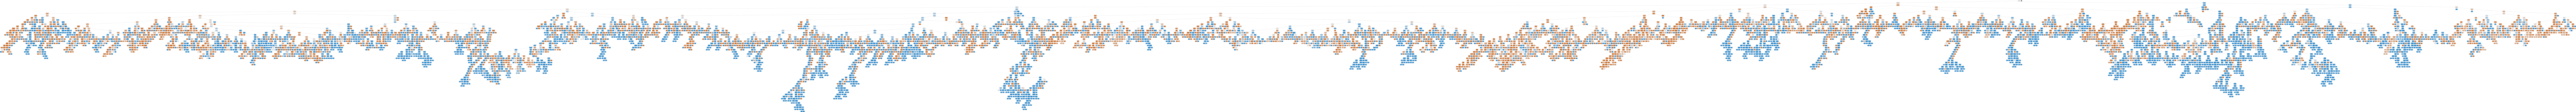

In [ ]:
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydot
from sklearn.tree import export_graphviz 
dot_data = StringIO()
tree.export_graphviz(classifier,
out_file = dot_data,
feature_names = X1.columns[:],
class_names = ['False','True'],
filled = True,
rounded = True,
special_characters = True)
graph,= pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Predicting a new result

In [ ]:
print(classifier.predict([X_test[305]]))

[0]


In [ ]:
print(y_test[305])

0


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
# On the training set
classifier.score(X_train, y_train)

0.9901967994351945

In [ ]:
# On the test set (unseen)
classifier.score(X_test, y_test)

0.9625602909780976

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22077   577]
 [  370  2270]]


0.9625602909780976

In [ ]:
cm1=pd.crosstab(y_test,y_pred,rownames=["Actual labels"],colnames=["Predicted Labels"],margins=True)
cm1

Predicted Labels      0     1    All
Actual labels                       
0                 22077   577  22654
1                   370  2270   2640
All               22447  2847  25294

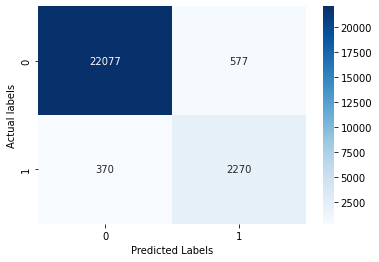

In [ ]:
cm2=pd.crosstab(y_test,y_pred,rownames=["Actual labels"],colnames=["Predicted Labels"])
sn.heatmap(cm2,annot=True ,cmap='Blues',fmt='g')
plt.show()

## Final Classification 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     22654
           1       0.80      0.86      0.83      2640

    accuracy                           0.96     25294
   macro avg       0.89      0.92      0.90     25294
weighted avg       0.96      0.96      0.96     25294



## ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


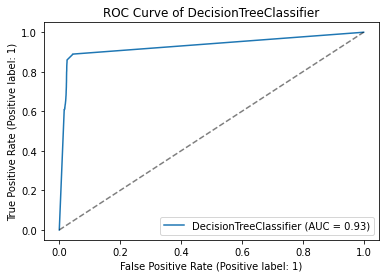

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
classifier_disp = metrics.plot_roc_curve(classifier, X_test, y_test)
plt.title("ROC Curve of {}".format(type(classifier).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.5)
plt.savefig("mygraph.png")

## Grid Search - to determine best hyperparameters for the model 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion' :['entropy'],'max_depth':[5,6,7,8,9,10,11],'min_samples_split':[2,5,10,20]},{'criterion' :['gini'],
                                                        'max_depth':[5,6,7,8,9,10,11],'min_samples_split':[2,5,10,20]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                
 n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.47 %
Best Parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2}


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.32 %
Standard Deviation: 1.35 %
